In [1]:
import numpy as np
f1 = open(".csv","rb")
features_selected1 =np.loadtxt(f1,delimiter=',',skiprows=0)
f1.close()
features_selected1 = np.array(features_selected1)
print(features_selected1.shape)

(644, 220)


In [2]:
# Read labels
target1 = np.load("/target.npy")
print(target1.shape)

(644,)


In [4]:
from imblearn.over_sampling import SMOTE
X_resampled_smote,y_resampled_smote = SMOTE(random_state = 42).fit_sample(features_selected1,target1)
features_selected1 = X_resampled_smote
target1 = y_resampled_smote
print(features_selected1.shape)
print(target1.shape)

(1668, 220)
(1668,)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Binarize the output
y1 = label_binarize(target1, classes=[0, 1, 2, 3])
n_classes = y1.shape[1]
# X1 represets the features which are selected
X1 = features_selected1

pipe = Pipeline([("scaler", MinMaxScaler()), 
                 ("svm",SVC(C=2, gamma=0.5, decision_function_shape="ovo",kernel="rbf",random_state = 21,probability=True))])

In [7]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(pipe)
y_score1 = []
loo = LeaveOneOut()
for train, test in loo.split(X1,y1):
    # Obtain the "certainty score" of a lncRNA sequence for each class
    y_score1_i = classifier.fit(X1[train], y1[train]).decision_function(X1[test])
    y_score1.append(y_score1_i.ravel().tolist())
y_score1 = np.array(y_score1)

In [8]:
# Compute ROC curve and ROC area for each class
fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()
for i in range(n_classes):
    fpr1[i], tpr1[i], _ = roc_curve(y1[:, i], y_score1[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])

In [9]:
# Compute micro-average ROC curve and ROC area
fpr1["micro"], tpr1["micro"], _ = roc_curve(y1.ravel(), y_score1.ravel())
roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])

In [11]:
import numpy as np
f2 = open(".csv","rb")
features_selected2 =np.loadtxt(f2,delimiter=',',skiprows=0)
f2.close()
features_selected2 = np.array(features_selected2)
print(features_selected2.shape)
# Read labels
target2= np.load("/target2.npy")
print(target2.shape)
from imblearn.over_sampling import SMOTE
X_resampled_smote,y_resampled_smote = SMOTE(random_state = 42).fit_sample(features_selected2,target2)
features_selected2 = X_resampled_smote
target2 = y_resampled_smote
print(features_selected2.shape)
print(target2.shape)

(178, 220)
(178,)
(336, 220)
(336,)


In [12]:
# Binarize the output
y2 = label_binarize(target2, classes=[0, 1, 2, 3])
n_classes = y2.shape[1]
# X2 represets the features which are selected
X2 = features_selected2

pipe = Pipeline([("scaler", MinMaxScaler()), 
                 ("svm",SVC(C=2, gamma=0.25, decision_function_shape="ovo",kernel="rbf",random_state = 21,probability=True))])


In [13]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(pipe)
y_score2 = []
loo = LeaveOneOut()
for train, test in loo.split(X2,y2):
    # Obtain the "certainty score" of a lncRNA sequence for each class
    y_score2_i = classifier.fit(X2[train], y2[train]).decision_function(X2[test])
    y_score2.append(y_score2_i.ravel().tolist())
y_score2 = np.array(y_score2)

In [14]:
# Compute ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y2[:, i], y_score2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

In [15]:
# Compute micro-average ROC curve and ROC area
fpr2["micro"], tpr2["micro"], _ = roc_curve(y2.ravel(), y_score2.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])

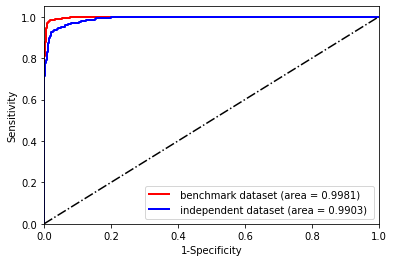

In [22]:
# Plot the ROC curve
plt.plot(fpr1["micro"], tpr1["micro"], color='red', linewidth=2,label = ' Training dataset (area = %0.4f)  '%roc_auc1["micro"])
plt.plot(fpr2["micro"], tpr2["micro"], color='blue', linewidth=2,label = ' Independent dataset (area = %0.4f) '%roc_auc2["micro"])
plt.plot([0,1],[0,1],color ='black',linewidth = 1.5,linestyle = '-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
ax = plt.gca()

plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc="lower right")
plt.show()